Sentiment analysis

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
import seaborn as sns
from wordcloud import WordCloud

In [42]:
# Download required NLTK data
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anton\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\anton\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\anton\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [43]:
pd.set_option('display.max_columns', None)
data = pd.read_csv('dataset.csv')

In [44]:
# Select top 10 games by number of reviews
top_games = data['app_name'].value_counts().nlargest(5).index
data = data[data['app_name'].isin(top_games)]

In [45]:
data.head()

,app_id,app_name,review_text,review_score,review_votes
68092,105600,Terraria,You can be a werewolf riding a unicorn while s...,1,0
68093,105600,Terraria,You should by 8 copies of this game and go aro...,1,0
68094,105600,Terraria,Introduction,1,1
68095,105600,Terraria,"If you have friends, this is a great game to p...",1,1
68096,105600,Terraria,A Generic Comparison of Terraria versus Minecr...,1,0


In [46]:
# Get the unique values of 'B' column
unique_values = data['app_name'].unique()

# Print the unique values
print("\nUnique values in column:")
print(len(unique_values))
for app in unique_values:
    print(app)


Unique values in column:
5
Terraria
PAYDAY 2
DayZ
Rust
Dota 2


In [47]:
# Data Preprocessing
def clean_text(text):
    text = str(text).lower()  # Convert to lowercase
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z ]', '', text)  # Remove special characters
    words = word_tokenize(text)  # Tokenization
    words = [word for word in words if word not in stopwords.words('english')]  # Remove stopwords
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]  # Lemmatization
    return ' '.join(words)

In [48]:
data['cleaned_review'] = data['review_text'].apply(clean_text)

In [52]:
data.to_csv('processed_data.csv')

In [49]:
# Sentiment Analysis
def get_sentiment(text):
    sentiment_score = TextBlob(text).sentiment.polarity
    if sentiment_score > 0:
        return 'Positive'
    elif sentiment_score < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [50]:
data['sentiment'] = data['cleaned_review'].apply(get_sentiment)


Sentiment Analysis for PAYDAY 2
sentiment
Positive    48829
Negative    27383
Neutral     12761
Name: count, dtype: int64


C:\Users\anton\AppData\Local\Temp\ipykernel_792\1424934398.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=game_df, palette='coolwarm')


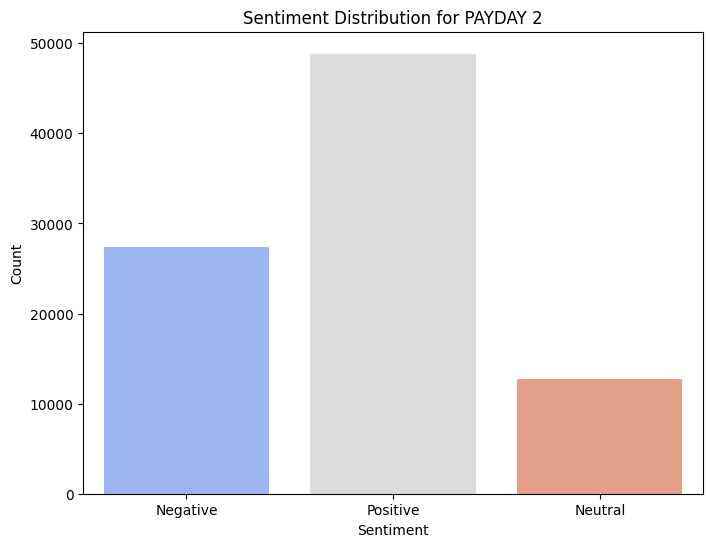

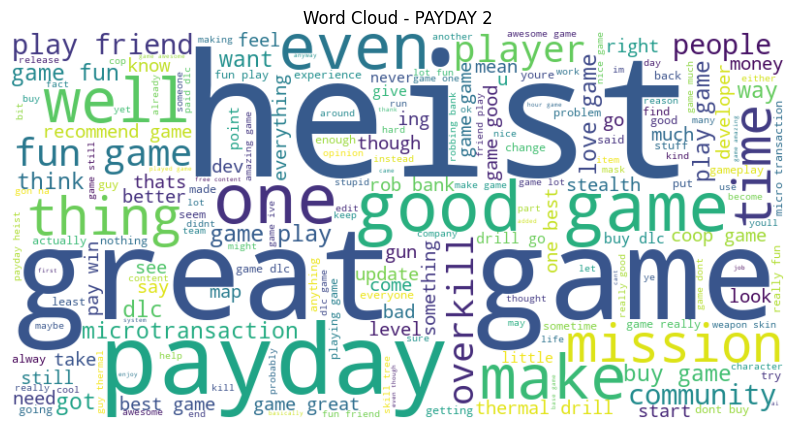


Sentiment Analysis for DayZ
sentiment
Positive    88850
Name: count, dtype: int64


C:\Users\anton\AppData\Local\Temp\ipykernel_792\1424934398.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=game_df, palette='coolwarm')


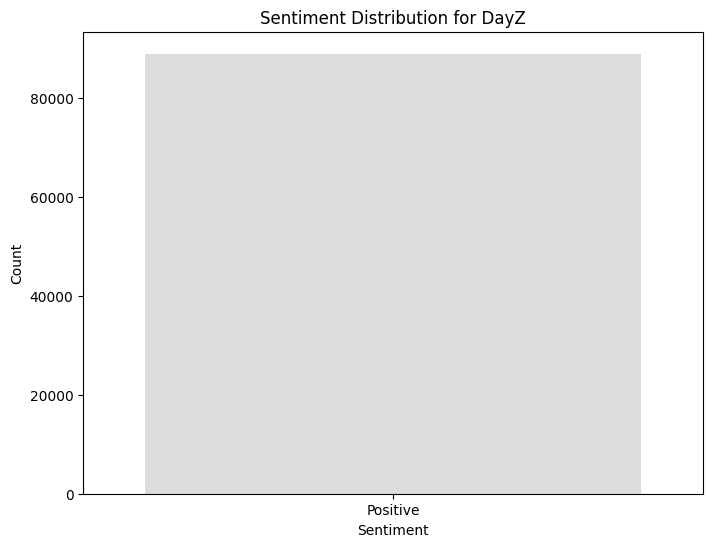

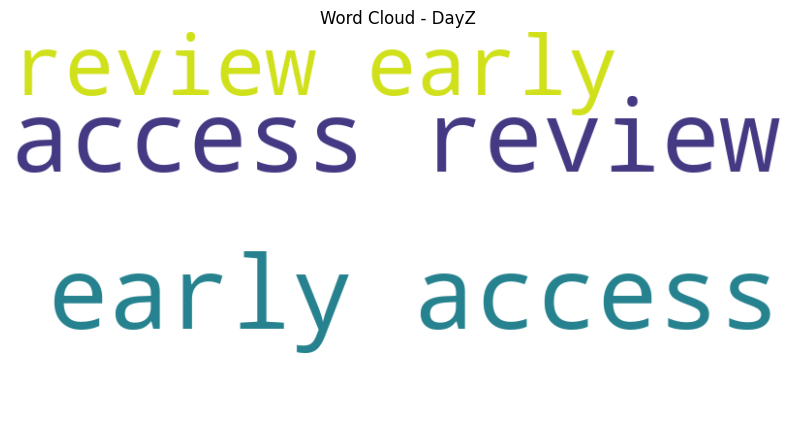


Sentiment Analysis for Terraria
sentiment
Positive    54017
Negative    21996
Neutral      8815
Name: count, dtype: int64


C:\Users\anton\AppData\Local\Temp\ipykernel_792\1424934398.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=game_df, palette='coolwarm')


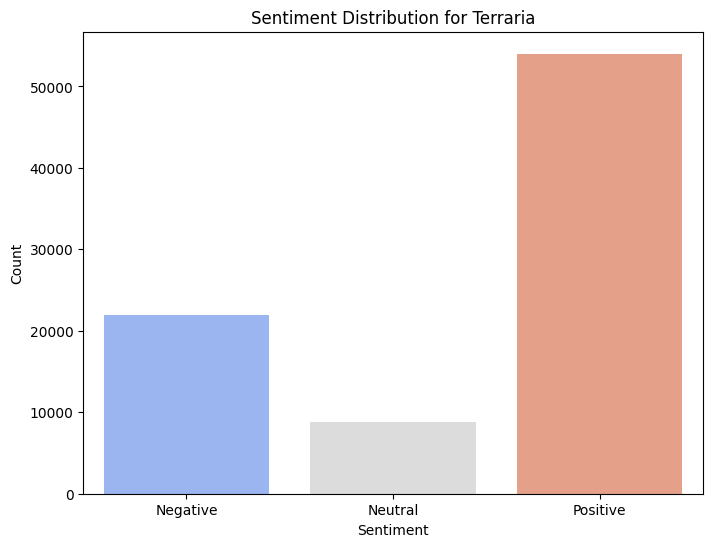

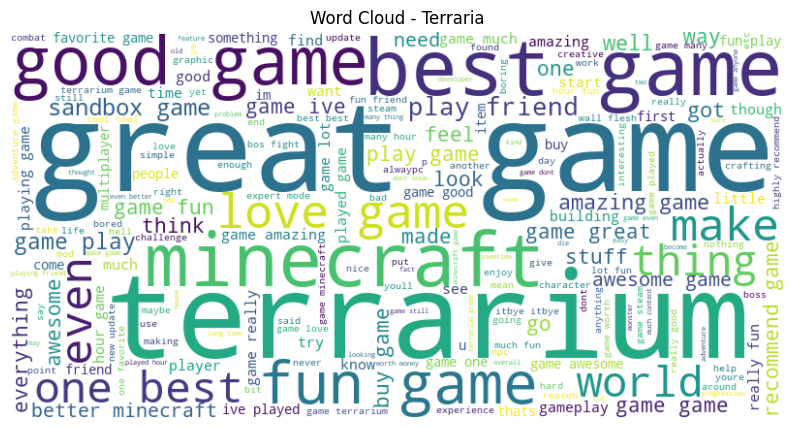


Sentiment Analysis for Rust
sentiment
Positive    77036
Negative        1
Name: count, dtype: int64


C:\Users\anton\AppData\Local\Temp\ipykernel_792\1424934398.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=game_df, palette='coolwarm')


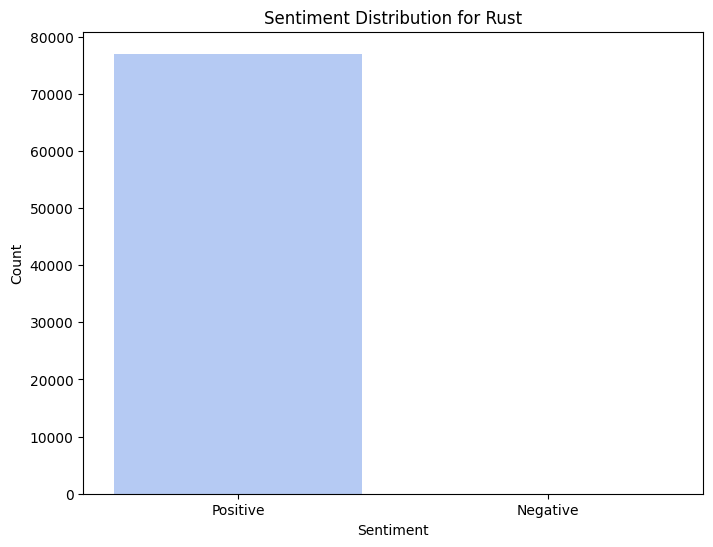

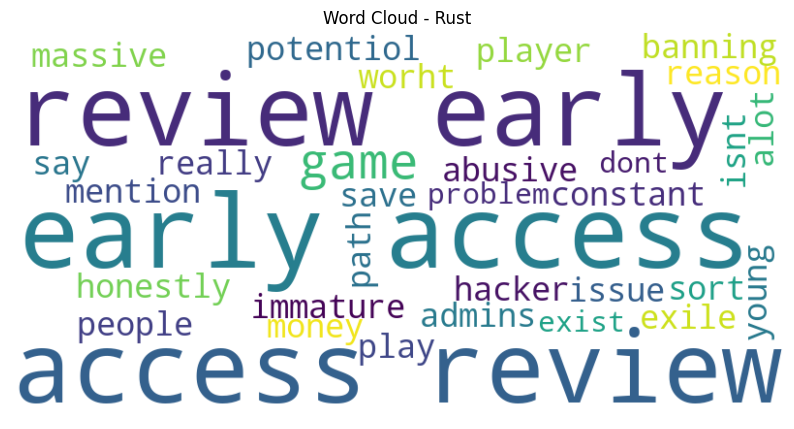


Sentiment Analysis for Dota 2
sentiment
Positive    38442
Negative    21281
Neutral     13818
Name: count, dtype: int64


C:\Users\anton\AppData\Local\Temp\ipykernel_792\1424934398.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=game_df, palette='coolwarm')


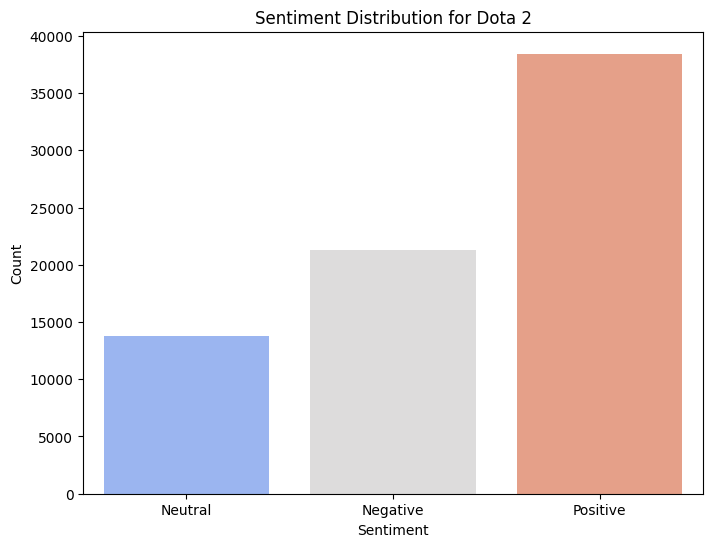

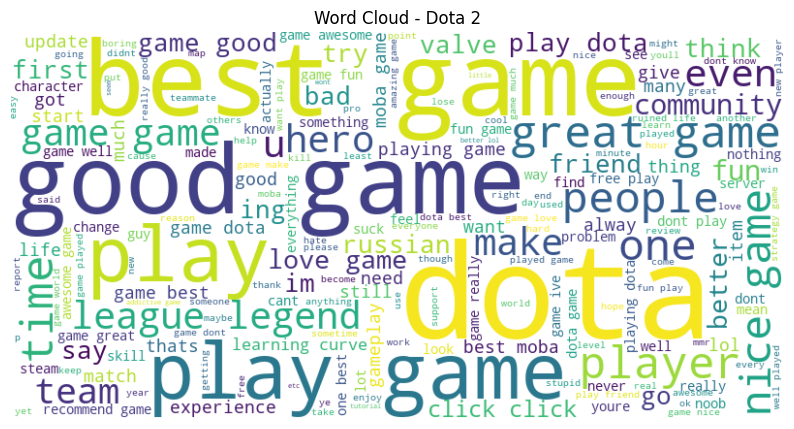

In [51]:
# Exploratory Data Analysis for each game
for game in top_games:
    game_df = data[data['app_name'] == game]
    print(f"\nSentiment Analysis for {game}")
    print(game_df['sentiment'].value_counts())

    # Visualization
    plt.figure(figsize=(8, 6))
    sns.countplot(x='sentiment', data=game_df, palette='coolwarm')
    plt.title(f"Sentiment Distribution for {game}")
    plt.xlabel("Sentiment")
    plt.ylabel("Count")
    plt.show()

    # Word Cloud for each game
    game_text = ' '.join(game_df['cleaned_review'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(game_text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud - {game}")
    plt.show()